In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from warnings import filterwarnings

In [29]:
data = pd.read_excel("C:/Users/HP/Desktop/GreenAIWorkshop/predict_energy_consumption.xlsx")
data.head()

,temperature,humidity,wind_speed,solar_irradiance,energy_consumption
0,24.363503,31.107976,5.234114,705.432695,307.398145
1,38.767858,52.514057,4.939576,817.013258,412.444548
2,33.299849,72.376750,18.125092,325.421109,392.072418
3,29.966462,63.933493,4.990924,662.386690,119.254957
4,18.900466,68.393669,5.438995,614.571385,117.162261


In [30]:
data.shape

(1000, 5)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   temperature         1000 non-null   float64
 1   humidity            1000 non-null   float64
 2   wind_speed          1000 non-null   float64
 3   solar_irradiance    1000 non-null   float64
 4   energy_consumption  1000 non-null   float64
dtypes: float64(5)
memory usage: 39.2 KB


In [32]:
data.describe(include="all")

,temperature,humidity,wind_speed,solar_irradiance,energy_consumption
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,27.256414,50.421038,10.048115,541.337543,272.347395
std,7.303434,17.531394,5.813484,257.840410,129.064474
min,15.115801,20.193096,0.000233,100.588052,50.013823
25%,20.899332,34.464456,5.227020,317.710693,160.238303
50%,27.420184,51.124034,10.012278,535.851355,272.569144
75%,33.607990,65.627903,15.182071,763.786729,382.997053
max,39.992942,79.964824,19.956417,999.601933,498.987225


In [33]:
data.isnull().sum()

temperature           0
humidity              0
wind_speed            0
solar_irradiance      0
energy_consumption    0
dtype: int64

In [34]:
data.tail()

,temperature,humidity,wind_speed,solar_irradiance,energy_consumption
995,17.289552,59.417309,17.305915,497.896331,453.828793
996,37.932839,77.396877,3.145464,400.961061,103.721455
997,18.420466,24.137481,6.195757,455.115084,197.529277
998,38.755934,23.423283,5.800911,576.946528,417.085421
999,26.150144,36.931224,17.428281,245.230623,318.790570


In [35]:
data.axes

[RangeIndex(start=0, stop=1000, step=1),
 Index(['temperature', 'humidity', 'wind_speed', 'solar_irradiance',
        'energy_consumption'],
       dtype='object')]

In [36]:
data.columns

Index(['temperature', 'humidity', 'wind_speed', 'solar_irradiance',
       'energy_consumption'],
      dtype='object')

In [37]:
x=data[['temperature', 'humidity', 'wind_speed', 'solar_irradiance']].values
y=data['energy_consumption'].values

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [39]:
scaler = StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [41]:
model = Sequential([
    Dense(64, activation='relu',input_shape=(x_train.shape[1],)),
    Dense(32,activation='relu'),
    Dense(1)
])

In [42]:
model.compile(optimizer='adam',loss='mse',metrics=['mae'])

In [43]:
history = model.fit(x_train,y_train,epochs=50,batch_size=32,validation_split=0.2,verbose=1)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 89200.7188 - mae: 269.8612 - val_loss: 83408.5781 - val_mae: 258.4510
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 89204.6641 - mae: 270.9510 - val_loss: 82623.7656 - val_mae: 256.9153
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 90708.5547 - mae: 273.1941 - val_loss: 81290.6719 - val_mae: 254.2941
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 85432.3906 - mae: 262.8172 - val_loss: 79158.7031 - val_mae: 250.0409
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 86920.4766 - mae: 265.5261 - val_loss: 75998.4375 - val_mae: 243.6019
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 80367.9453 - mae: 253.4972 - val_loss: 71650.6406 - val_mae: 234.4373
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 75574.8984 - mae: 243.3991 - val_loss: 65974.8906 - val_mae: 221.8992
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 73045.9062 - mae: 236.0619 - val_loss: 59116.

In [44]:
test_loss,test_mae=model.evaluate(x_test,y_test,verbose=1)
print(f"Test Mean Absolute Error: {test_mae:.2f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 17881.7168 - mae: 114.9306 
Test Mean Absolute Error: 115.47


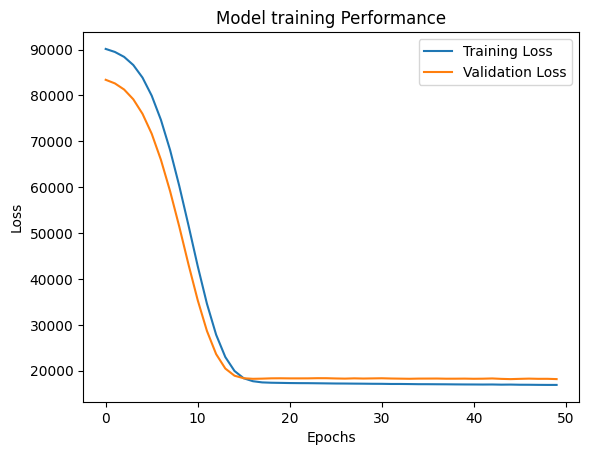

In [45]:
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model training Performance')
plt.legend()
plt.show()

In [46]:
predictions = model.predict(x_test)
predictions

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


array([[288.0658 ],
       [253.52528],
       [256.61633],
       [209.0637 ],
       [336.93286],
       [312.13715],
       [314.4145 ],
       [293.03934],
       [298.01852],
       [280.27567],
       [240.574  ],
       [264.38672],
       [272.92218],
       [233.83734],
       [292.97543],
       [321.95218],
       [259.48386],
       [317.4898 ],
       [304.9732 ],
       [243.68877],
       [273.882  ],
       [281.35846],
       [267.62292],
       [272.68292],
       [249.36676],
       [243.39696],
       [258.62582],
       [314.96106],
       [321.36682],
       [270.9783 ],
       [233.09326],
       [315.0023 ],
       [292.10016],
       [260.8675 ],
       [305.00198],
       [291.48425],
       [214.72453],
       [261.79083],
       [277.89984],
       [241.05768],
       [239.12814],
       [251.67438],
       [253.2504 ],
       [261.99777],
       [273.37698],
       [256.11176],
       [264.68298],
       [253.2594 ],
       [297.52652],
       [292.8427 ],


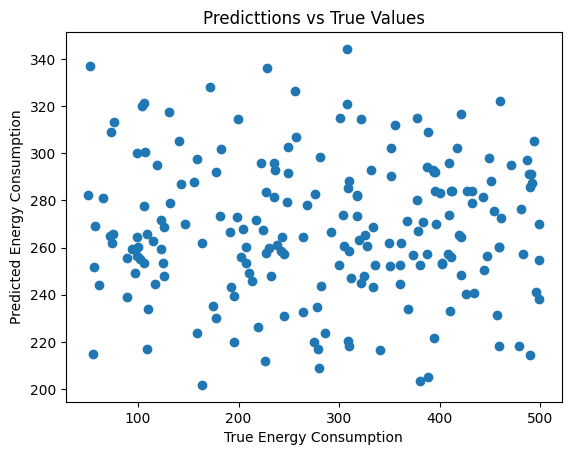

In [47]:
plt.scatter(y_test,predictions)
plt.xlabel('True Energy Consumption')
plt.ylabel('Predicted Energy Consumption')
plt.title('Predicttions vs True Values')
plt.show()